First, load the data,in this notebook we are using the TARA data from Ashley's github

In [2]:
import sys
sys.path.append('./Code')
import loadData 
import RunML
import FS

import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

### read the 3 files

In [52]:
metadata = pd.read_csv('../Bigdatafolder/rhizo_files/ITS_rhizosphere_metadata.csv')

In [53]:
print(metadata)

        Unnamed: 0      habitat irrigation drought_tolerance marker_gene
0      1016-1-14-3  rhizosphere       full              HI30         ITS
1     1016-2-16-75  rhizosphere       full              HI30         ITS
2      1016-3-6-42  rhizosphere    reduced              HI30         ITS
3     1016-4-21-30  rhizosphere    reduced              HI30         ITS
4     1024-1-12-41  rhizosphere       full              LO30         ITS
..             ...          ...        ...               ...         ...
57  GW9953-4-27-30  rhizosphere    reduced              LO30         ITS
58    GW9964-1-4-3  rhizosphere       full              LO30         ITS
59   GW9964-2-6-50  rhizosphere       full              LO30         ITS
60  GW9964-3-10-16  rhizosphere    reduced              LO30         ITS
61  GW9964-4-25-10  rhizosphere    reduced              LO30         ITS

[62 rows x 5 columns]


In [54]:
metadata.shape

(62, 5)

In [6]:
metadata['drought_tolerance'].value_counts()

drought_tolerance
LO30    32
HI30    30
Name: count, dtype: int64

In [7]:
metadata['marker_gene'].value_counts()

marker_gene
ITS    62
Name: count, dtype: int64

In [8]:
label1 = metadata['drought_tolerance']

In [30]:
#label2 = metadata['marker_gene']

In [9]:
rhizosphere_otu0 = pd.read_csv('../Bigdatafolder/rhizo_files/ITS_rhizosphere_otu.csv',index_col=0)

In [10]:
rhizosphere_otu0.shape

(13819, 62)

In [11]:
rhizosphere_otu = rhizosphere_otu0.T

In [12]:
ASV = list(rhizosphere_otu.columns)

In [14]:
len(ASV)

13819

In [15]:
data = rhizosphere_otu

In [16]:
data

,0008d8b083042ca29ace558fe3840fed,00133e612bfa794a439e34b9a0f99988,0016380ec7ace7724205c9fc70fb30df,00198b9ed63c841bf4130f614b4e044a,0019ce0de0bbd3440437e1071cd9d544,001a89a493296be0654aa917509df3ba,001f18c0622ce51cf92493625ad39367,0020feffc2bf42443932f9a4a0d47f0e,0026469361e47a05a740352addf8a88f,0026ec499d1c31acbd890c491702a5f4,...,ffda3d36107a9f801596168986eb370f,ffde533ac801381a7e869f58f5937131,ffe529f646d4d1a7b6fca0cb0c18d7c9,ffe60ef2c7d147036972d61c31a37b05,ffec72a1d4dc42cdcb5f56e7d30b772f,ffecb85b19087104f570b3412d180618,fff56abcade2e6ca7307e0800f650f3d,fff74169503bab880be5f31c8439eafd,fffa8a90cf4567803b2d3a4fcb2881a1,fffb5f9b6f3273aa47f0e90fb70778ce
1016-1-14-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016-2-16-75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016-3-6-42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016-4-21-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1024-1-12-41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GW9953-4-27-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GW9964-1-4-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GW9964-2-6-50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GW9964-3-10-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ASV

['0008d8b083042ca29ace558fe3840fed',
 '00133e612bfa794a439e34b9a0f99988',
 '0016380ec7ace7724205c9fc70fb30df',
 '00198b9ed63c841bf4130f614b4e044a',
 '0019ce0de0bbd3440437e1071cd9d544',
 '001a89a493296be0654aa917509df3ba',
 '001f18c0622ce51cf92493625ad39367',
 '0020feffc2bf42443932f9a4a0d47f0e',
 '0026469361e47a05a740352addf8a88f',
 '0026ec499d1c31acbd890c491702a5f4',
 '00340d3e4923fcbcf43e9a934211e04b',
 '0034ebcef756b84be5a1b43f0d90ad92',
 '003acc81980acd55f10c5421d59ba056',
 '003bb4cd6403774ab3403b1648eedb05',
 '004147ba82be4dc9677744b125dc5c5d',
 '004a83ae2fe3569f16f6454f614e9748',
 '004bbf8884e74fc5f2cd6bc710df0e32',
 '004fede36247dd4d025c1be6eda40e99',
 '00515eb099a43d28c609f1f2d97b5ca0',
 '005541470cb57a768512f044b1e5a8e9',
 '0059a1c9104fa2572a2baf8978876e20',
 '005bdd10ea1ab797fd8084f1002ec377',
 '005bff917f6cf67d5b1e46cbaf7decdd',
 '006453b38a4d743406ede4bf1667cf69',
 '00654b20d1bd400355a743e22a041118',
 '0067b47c597584da60a6956ff5249c94',
 '006cff174309cd7f4d3aa30c3a13f84c',
 

In [18]:
data=RunML.normalizingMatrixToRanks(data,cutOff=0.01)
print(np.shape(data))

(62, 13819)


In [19]:
print(label1)

0     HI30
1     HI30
2     HI30
3     HI30
4     LO30
      ... 
57    LO30
58    LO30
59    LO30
60    LO30
61    LO30
Name: drought_tolerance, Length: 62, dtype: object


Perform multiLabel feature selection, this is done by calculating Kruskal-Wallis H-test on each OTU for each environmental factor, each OTU/ASV is given a weighted h score.

In [20]:
yList=[list(label1)]

In [21]:
weights=FS.multiLabelFeatureWeighting(data,yList)

In [23]:
len(weights)

13819

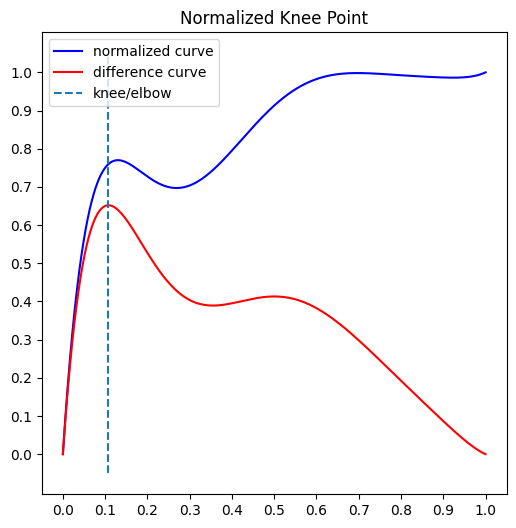

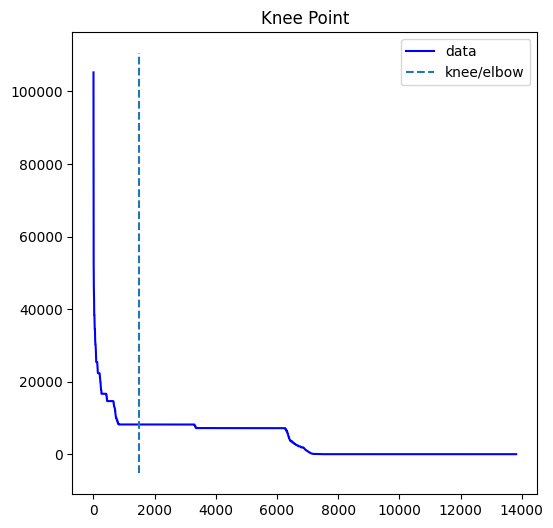

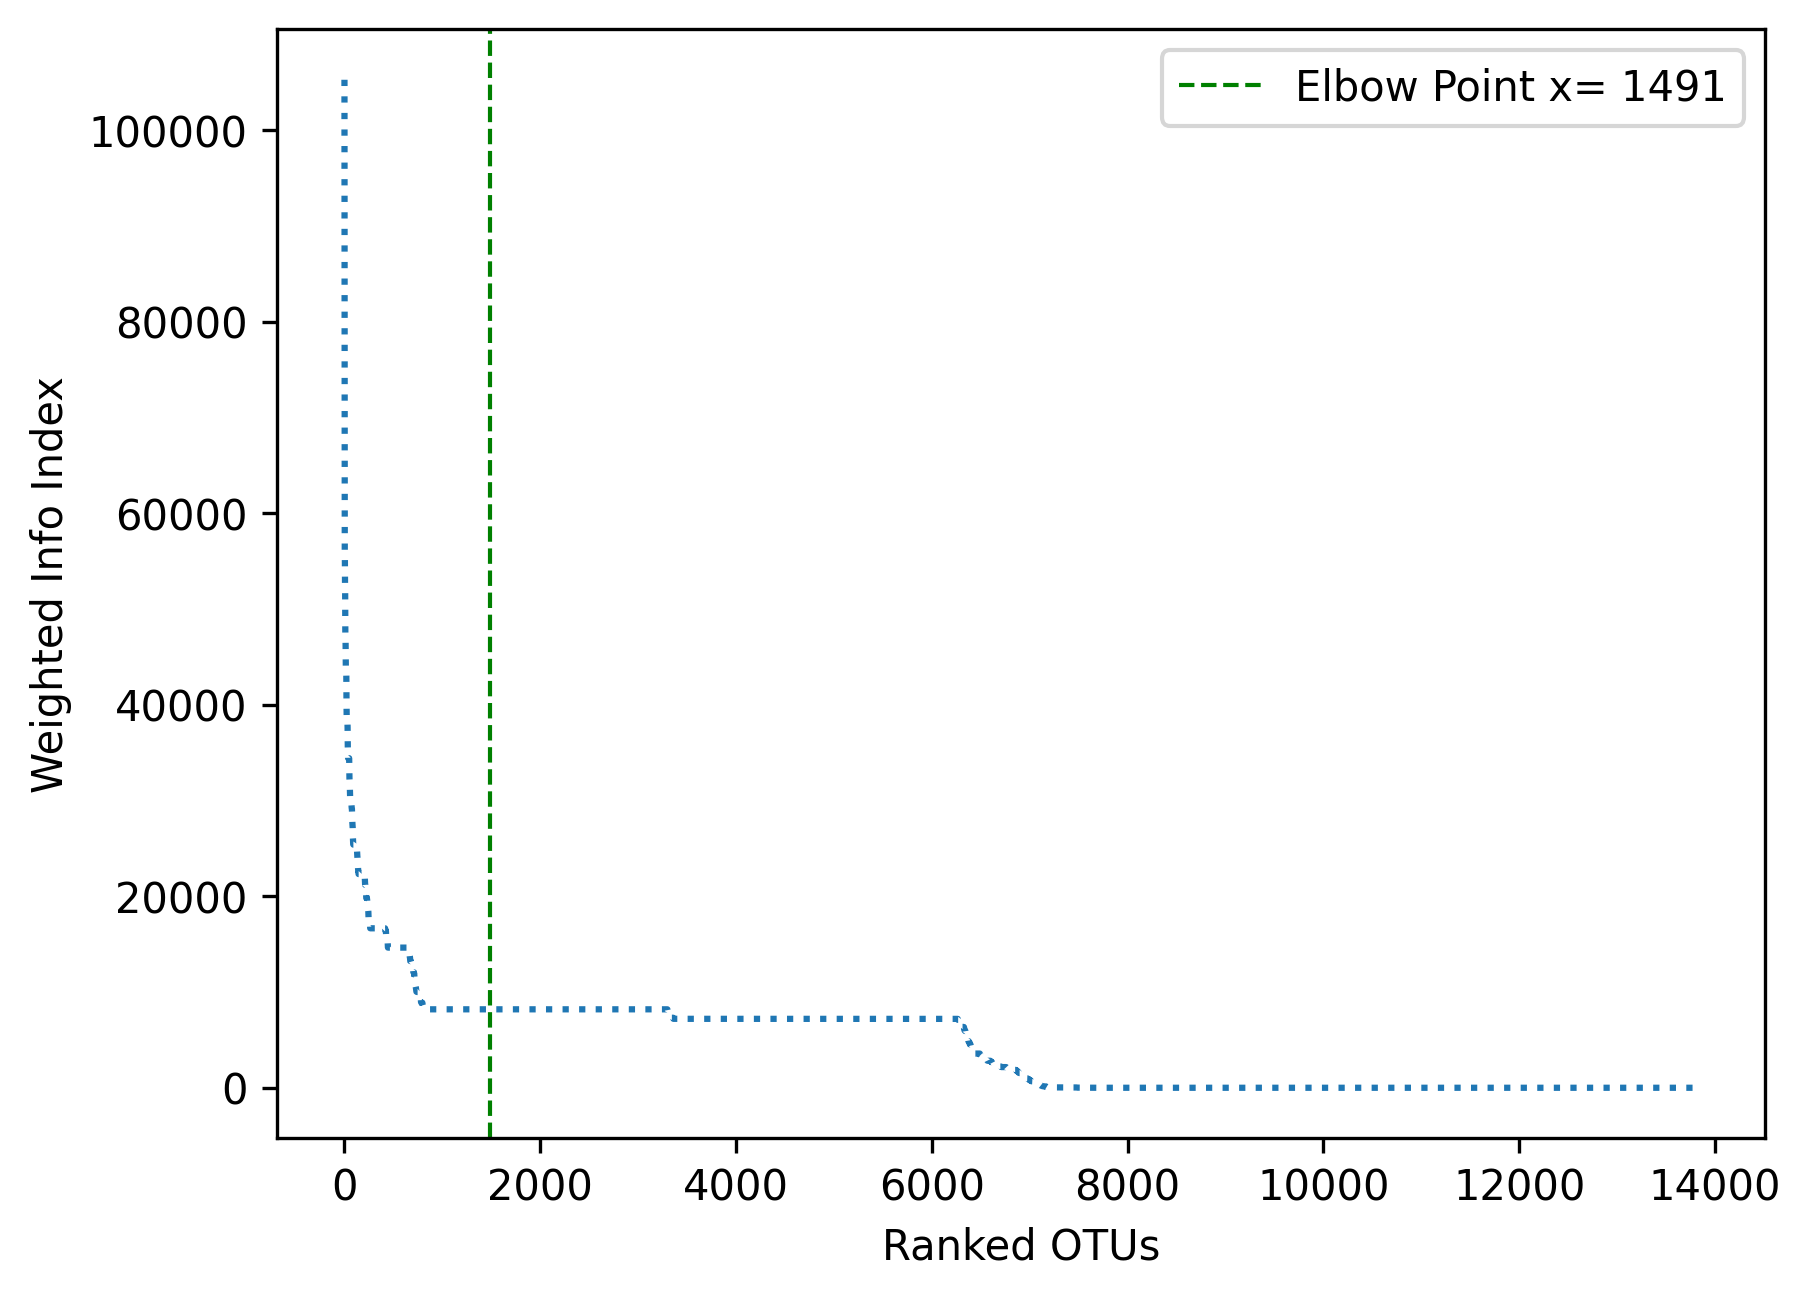

In [24]:
scores=(sorted(weights,reverse=True))
eps=FS.elbowPoint(scores)
FS.plotWeightedIndex(weights,xKnee=eps)


This plot shows that the gain in information decreases as we include more OTUs along the ranks. 

In [25]:
topFeature_selected=eps
print(eps)

X_FS,selectedOTU_index=FS.feature_select(data,yList,topFeature=topFeature_selected)
print (np.shape(X_FS))


1491
(62, 1491)


In [26]:
print(len(weights))

13819


In [27]:
clfs = {
    "SVM": svm.SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(random_state=0),
  #  "Logistic Regression": LogisticRegression()
}

In [28]:
targetLabel=label1 

In [29]:
# Initialize a dictionary to hold AUC scores
auc_scores = {}
for name, clf in clfs.items():
    auc = RunML.CFValidation_AUCstatistic(data,targetLabel,classifier= clf)
    auc_scores[name] = auc
print("AllFeatures",auc_scores)

AllFeatures {'SVM': 0.6091269841269841, 'Random Forest': 0.696031746031746}


In [30]:
auc_scores = {}
for name, clf in clfs.items():
    auc = RunML.CFValidation_AUCstatistic(X_FS,targetLabel,classifier= clf )
    auc_scores[name] = auc
print("SelectMicro",auc_scores)

SelectMicro {'SVM': 0.9944444444444445, 'Random Forest': 0.8666666666666668}


In [31]:
auc_list  = []
for ii in range(3):
    auc_scores = {}
    randomFeatures=random.sample(list(range(np.shape(data)[1])), topFeature_selected)
    X_randomFeatures=np.array(data)[:,randomFeatures]
    for name, clf in clfs.items():
        auc = RunML.CFValidation_AUCstatistic(X_randomFeatures,targetLabel,classifier= clf )
        auc_scores[name] = auc
    auc_list.append(auc_scores)
auc_pd = pd.DataFrame(auc_list)


In [32]:
print("Random Selection",auc_pd.mean())

Random Selection SVM              0.524074
Random Forest    0.630952
dtype: float64


In [33]:
X_Lasso=RunML.LassoFeatureSelection(data,targetLabel)

In [34]:
len(X_Lasso)

62

In [35]:
print(X_Lasso)

[[    0     0     0 ...     0     0 13767]
 [    0     0     0 ...     0 13671     0]
 [    0     0     0 ...     0 13811     0]
 ...
 [    0     0     0 ...     0 13719     0]
 [    0     0     0 ...     0 13801     0]
 [    0     0     0 ...     0 13787     0]]


In [36]:
auc_scores = {}
for name, clf in clfs.items():
    auc = RunML.CFValidation_AUCstatistic(X_Lasso,targetLabel,classifier= clf )
    auc_scores[name] = auc
print("SelectMicro",auc_scores)

SelectMicro {'SVM': 0.43650793650793657, 'Random Forest': 0.6349206349206349}


In [37]:
auc_list  = []
for ii in range(3):
    auc_scores = {}
    X_Lasso=RunML.LassoFeatureSelection(data,targetLabel)
    for name, clf in clfs.items():
        auc = RunML.CFValidation_AUCstatistic(X_Lasso,targetLabel,classifier= clf )
        auc_scores[name] = auc
    auc_list.append(auc_scores)
auc_pd = pd.DataFrame(auc_list)



In [38]:
print("LASSO Selection",auc_pd.mean())


LASSO Selection SVM              0.450529
Random Forest    0.634921
dtype: float64


## result 1 roc curve with variance

### on urban and Natural factor

In [39]:
clf=RandomForestClassifier(random_state=0)
targetLabel=label1                             

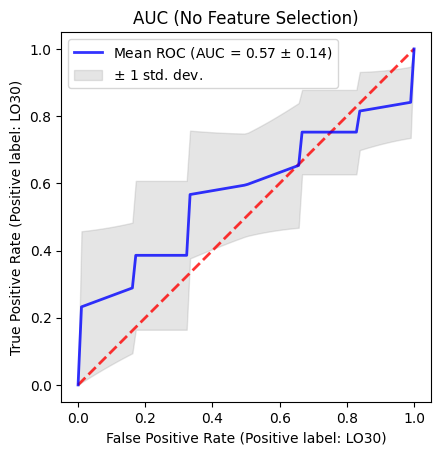

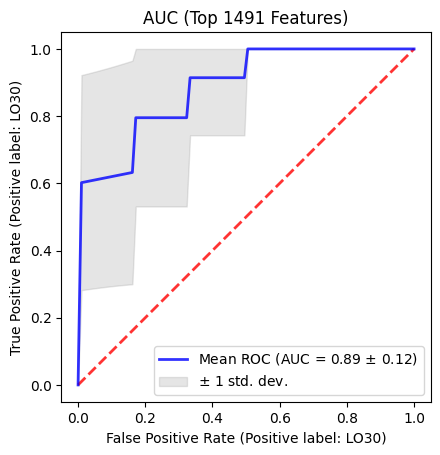

In [40]:
# plot for random forest for all features and SelectMicro
RunML.CrossFoldValidation_AUC(data,targetLabel,title="AUC (No Feature Selection)",classifier=clf)
RunML.CrossFoldValidation_AUC(X_FS,targetLabel,title=f'AUC (Top {eps} Features)',classifier=clf)
  

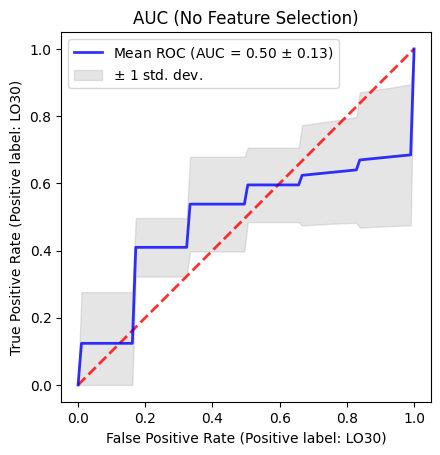

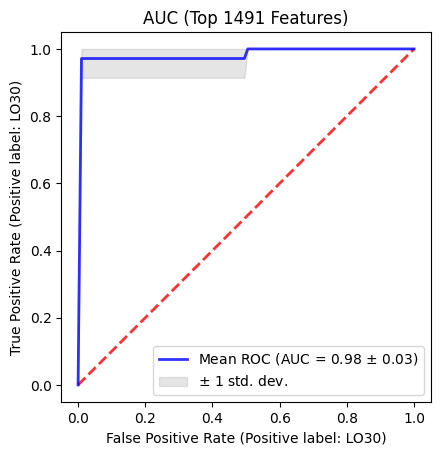

In [41]:
## plot for SVM for all features and SelectMicro
RunML.CrossFoldValidation_AUC(data,targetLabel,title="AUC (No Feature Selection)")
RunML.CrossFoldValidation_AUC(X_FS,targetLabel,title=f'AUC (Top {eps} Features)')

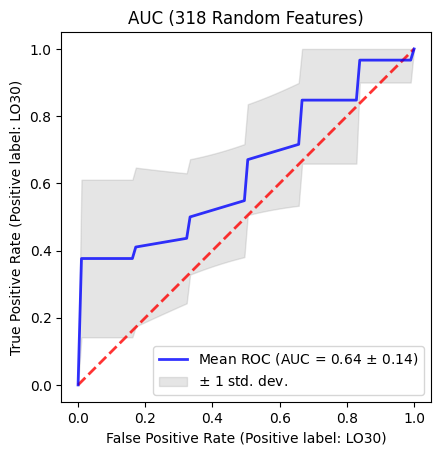

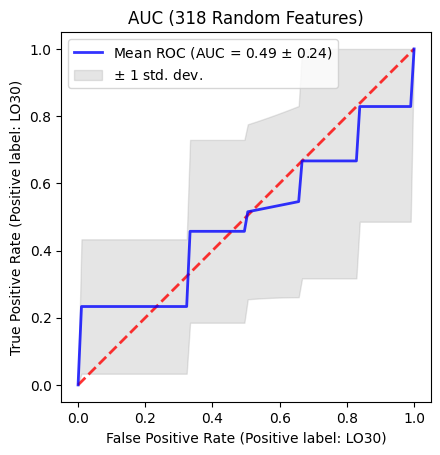

In [42]:
randomFeatures=random.sample(list(range(np.shape(data)[1])), topFeature_selected)
X_randomFeatures=np.array(data)[:,randomFeatures]
RunML.CrossFoldValidation_AUC(X_randomFeatures,targetLabel,title="AUC (318 Random Features)",classifier=clf)
RunML.CrossFoldValidation_AUC(X_randomFeatures,targetLabel,title="AUC (318 Random Features)")

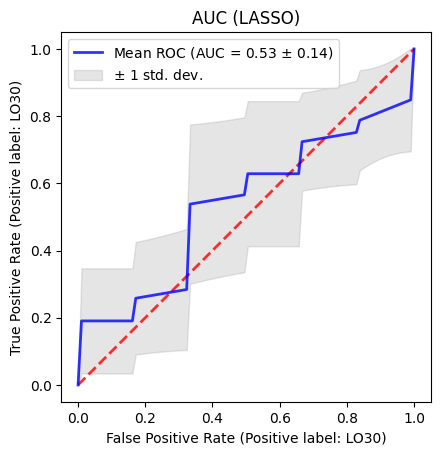

In [43]:
# random forest and SVM result for lasso selection: 
#for now, only the random forest AUC value is same with the value in table 1 which I calculated  using functions.
X_Lasso=RunML.LassoFeatureSelection(data,targetLabel)
RunML.CrossFoldValidation_AUC(X_Lasso,targetLabel,title="AUC (LASSO)",classifier=clf)

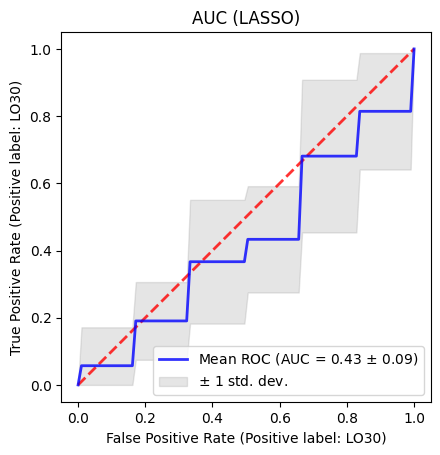

In [44]:
RunML.CrossFoldValidation_AUC(X_Lasso,targetLabel,title="AUC (LASSO)")

## Confusion matrix using RF

In [45]:
clf=RandomForestClassifier(random_state=0)

CF matrix has group names


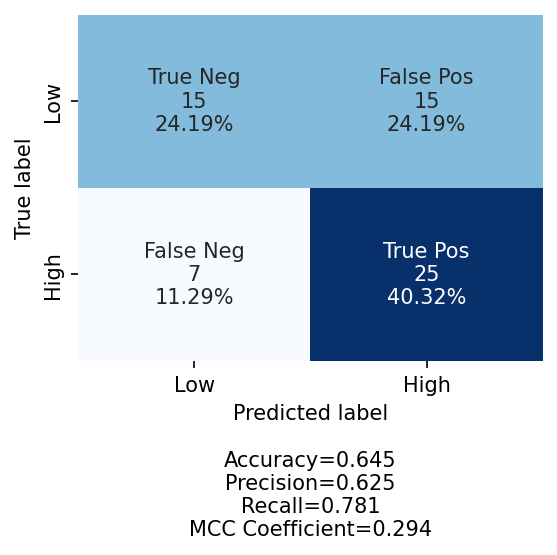

CF matrix has group names


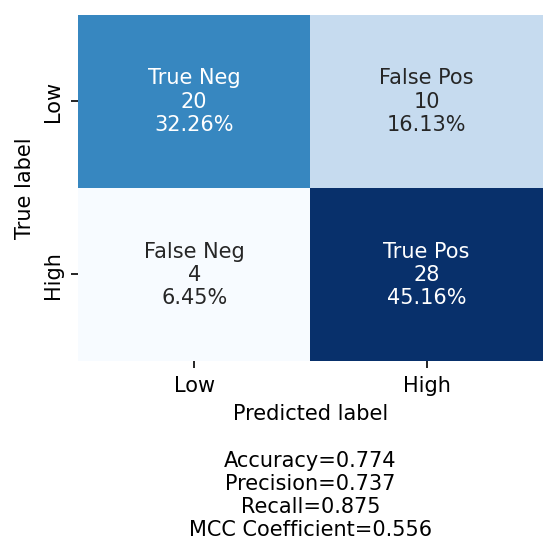

In [46]:
cat=["Low","High"] 
RunML.classificationHeatMap(data,targetLabel,cat,classifier=clf,title="")
RunML.classificationHeatMap(X_FS,targetLabel,cat,classifier=clf,title="")

## compare the first 15 index

In [50]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

entries=15
selectedOTU_index_15=selectedOTU_index[:entries]
X_FS_15=data[:,selectedOTU_index_15]

df=pd.DataFrame(data=X_FS_15)
selectedASVs=[ASV[i] for i in selectedOTU_index_15]

print(set(targetLabel))


{'HI30', 'LO30'}


32 30


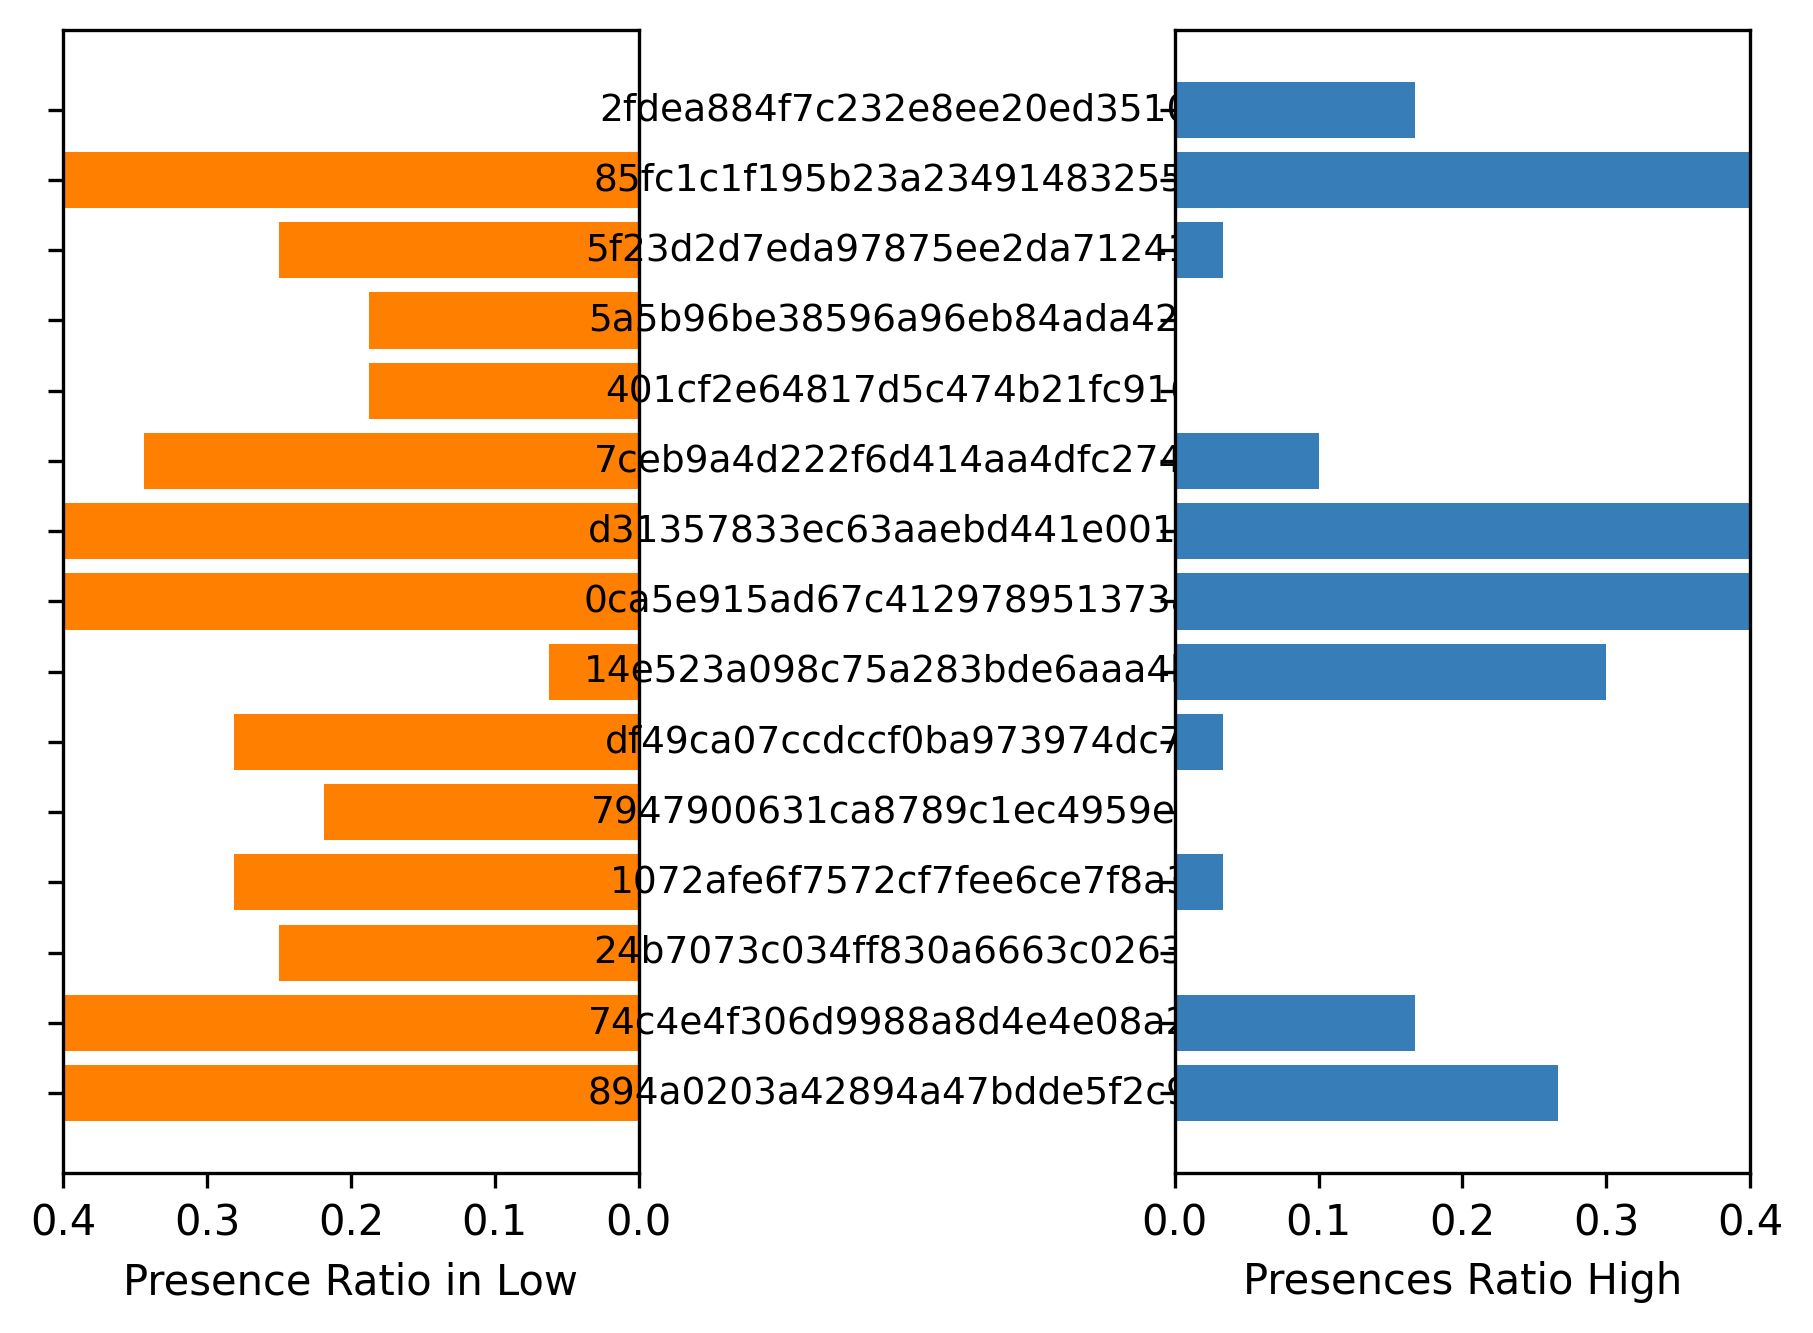

In [55]:
RunML.plotPresenseRatio(X_FS_15,targetLabel,selectedASVs,posLabel="LO30",posText="Low",negText="High",entries=entries)
